 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns_csv = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [7]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algo returns
algo_returns_csv = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [9]:
# Count nulls
print(algo_returns.isnull().sum())
print(algo_returns[algo_returns.isnull().any(axis = 1)])

Algo 1    0
Algo 2    6
dtype: int64
              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [10]:
# Drop nulls

algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$', '')
sp500_history["Close"]= sp500_history["Close"].astype('float')
sp500_history.dtypes


Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [16]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
combine_daily = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")
combine_daily


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

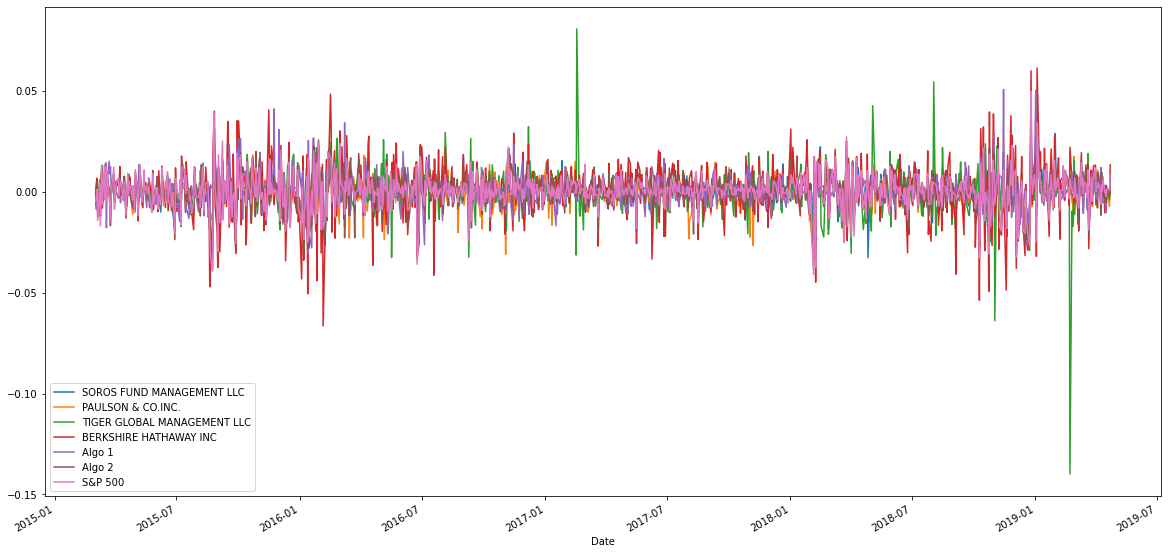

In [18]:
# Plot daily returns
combine_daily.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

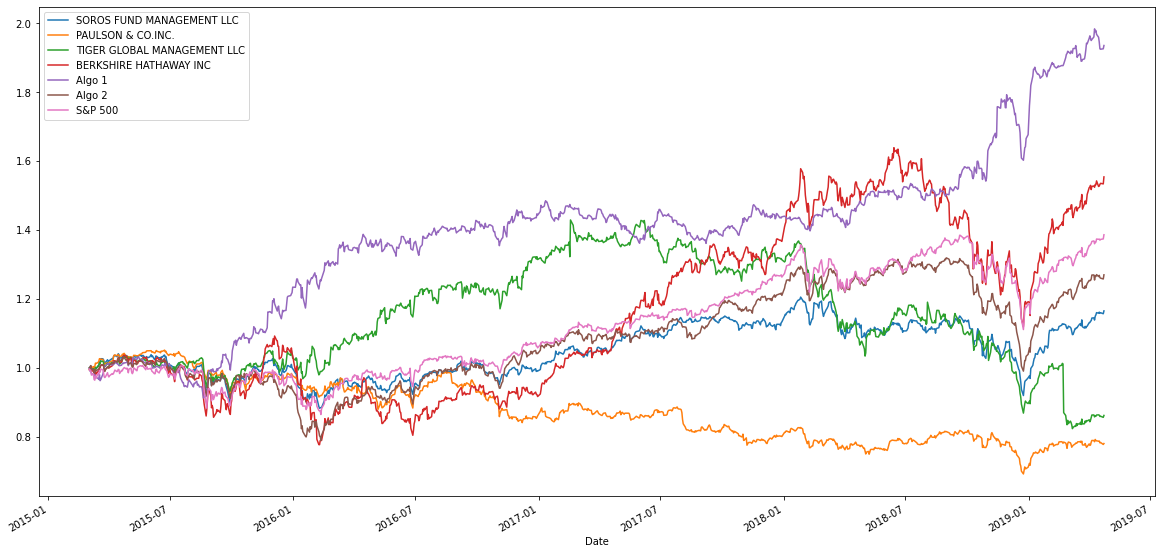

In [20]:
# Plot cumulative returns
combine_daily_q = (1 + combine_daily).cumprod()
combine_daily_q.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

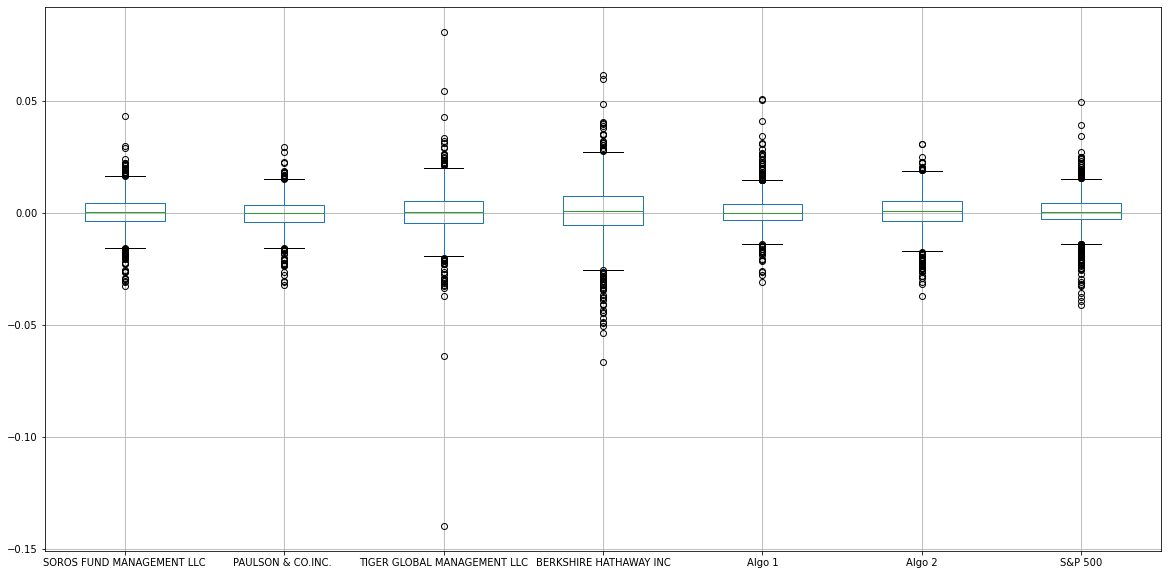

In [22]:
# Box plot to visually show risk
combine_daily.boxplot(figsize = (20, 10))


In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combine_daily_std = pd.DataFrame(combine_daily.std()).rename(columns = {0:"STD"})
combine_daily_std


,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [24]:
# Determine which portfolios are riskier than the S&P 500
higher_std = combine_daily_std[combine_daily_std["STD"] > combine_daily_std.loc["S&P 500", "STD"]]
higher_std

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [25]:
# Calculate the annualized standard deviation (252 trading days)
combine_daily_annualized_std = combine_daily_std*np.sqrt(252)
combine_daily_annualized_std

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

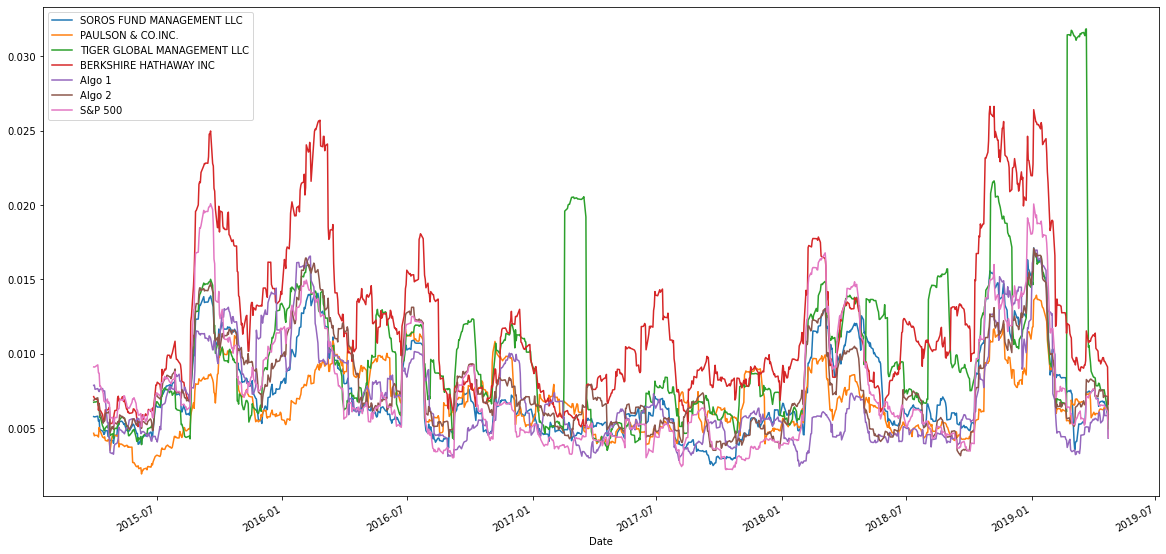

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_rolling = combine_daily.rolling(window = 21).std()
sp500_rolling.plot(figsize = (20, 10))

In [27]:
# Construct a correlation table
correlation_table = combine_daily.corr()
correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Rolling 60-Day Beta of Soros Fund Management'}, xlabel='Date'>

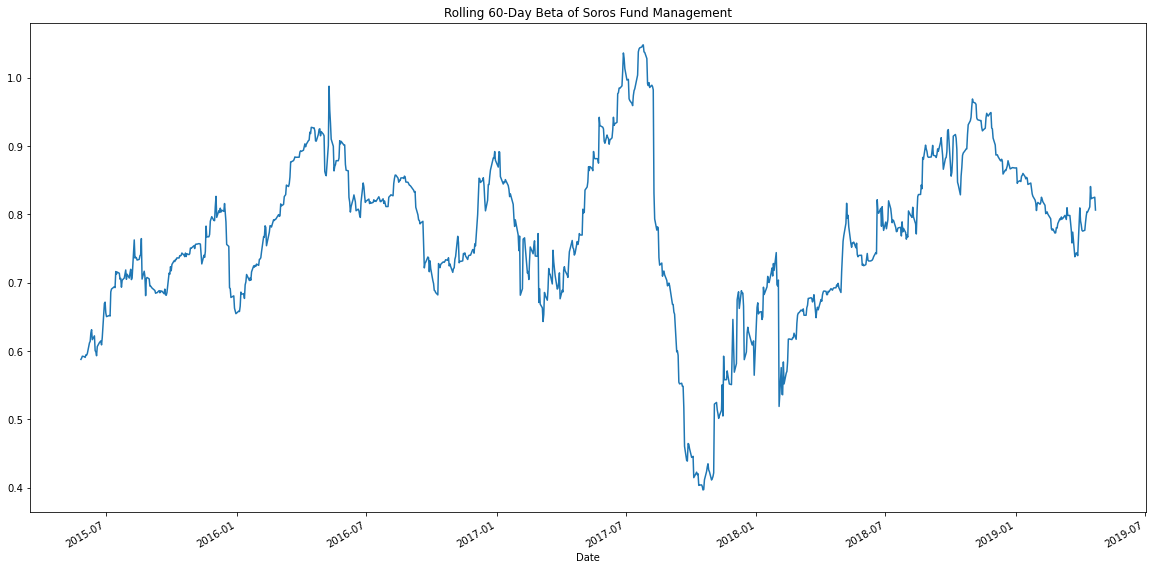

In [70]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = combine_daily['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combine_daily['S&P 500'])
rolling_variance = combine_daily['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund Management')

<AxesSubplot:xlabel='Date'>

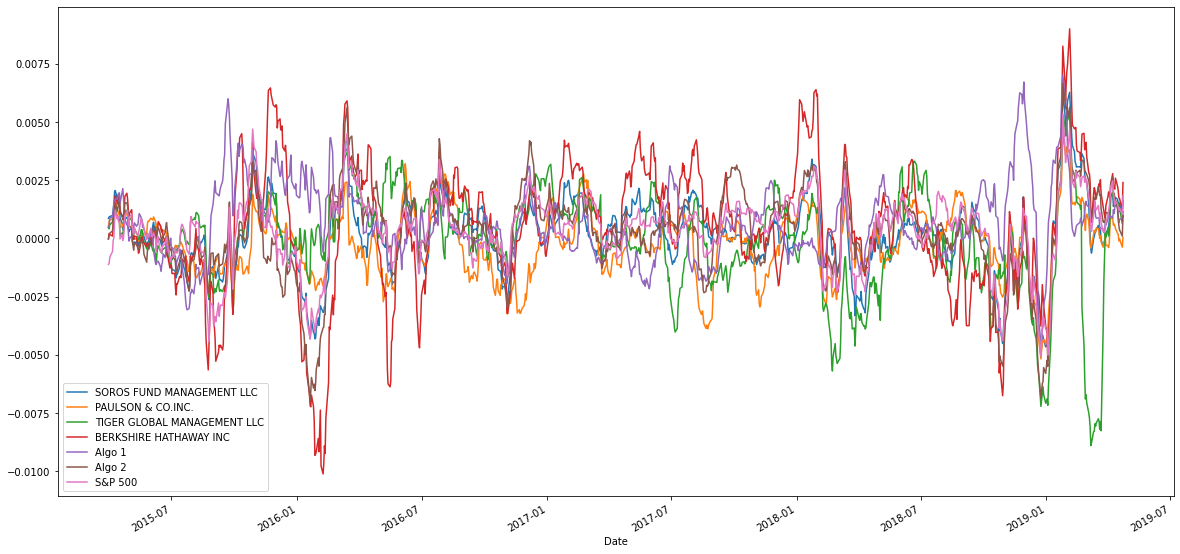

In [29]:
# Calculate a rolling window using the exponentially weighted moving average. 
combine_daily_exp = combine_daily.ewm(com=0.5).mean()
ewma_rolling = combine_daily_exp.rolling(window=21).mean()
ewma_rolling.plot(figsize = (20, 10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [30]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (combine_daily.mean() * 252) / (combine_daily.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

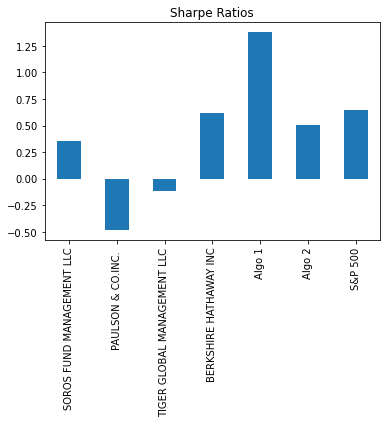

In [31]:
# Visualize the sharpe ratios as a bar plots
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Read the first stock
iau_history = pd.read_csv(Path("Resources/iau_history.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
iau_history.rename(columns = {"Close":"IAU"}, inplace = True)
iau_history.head()

,IAU
Date,
2015-01-02 16:00:00,11.50
2015-01-05 16:00:00,11.68
2015-01-06 16:00:00,11.79
2015-01-07 16:00:00,11.73
2015-01-08 16:00:00,11.69


In [34]:
# Read the second stock
voo_history = pd.read_csv(Path("Resources/voo_history.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
voo_history.rename(columns = {"Close":"VOO"}, inplace = True)
voo_history.head()

,VOO
Date,
2015-01-02 16:00:00,188.40
2015-01-05 16:00:00,185.09
2015-01-06 16:00:00,183.27
2015-01-07 16:00:00,185.56
2015-01-08 16:00:00,188.82


In [41]:
# Read the third stock

comt_history = pd.read_csv(Path("Resources/comt_history.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
comt_history.rename(columns = {"Close":"COMT"}, inplace = True)
comt_history.head()


,COMT
Date,
2015-01-02 16:00:00,41.19
2015-01-05 16:00:00,40.23
2015-01-06 16:00:00,39.69
2015-01-07 16:00:00,39.70
2015-01-08 16:00:00,39.96


In [40]:
# Read the forth stock 
vclt_history = pd.read_csv(Path("Resources/vclt_history.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
vclt_history.rename(columns = {"Close":"VCLT"}, inplace = True)
vclt_history.head()

,VCLT
Date,
2015-01-02 16:00:00,93.15
2015-01-05 16:00:00,93.30
2015-01-06 16:00:00,94.29
2015-01-07 16:00:00,94.47
2015-01-08 16:00:00,93.70


In [38]:
# Read the fifth stock
biv_history = pd.read_csv(Path("Resources/biv_history.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
biv_history.rename(columns = {"Close":"BIV"}, inplace = True)
biv_history.head()

,BIV
Date,
2015-01-02 16:00:00,84.87
2015-01-05 16:00:00,85.19
2015-01-06 16:00:00,85.57
2015-01-07 16:00:00,85.60
2015-01-08 16:00:00,85.44


In [42]:
# # Concatenate all stocks into a single DataFrame

my_stocks = pd.concat((iau_history, voo_history, comt_history, vclt_history, biv_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,IAU,VOO,COMT,VCLT,BIV
Date,,,,,
2015-01-02 16:00:00,11.50,188.40,41.19,93.15,84.87
2015-01-05 16:00:00,11.68,185.09,40.23,93.30,85.19
2015-01-06 16:00:00,11.79,183.27,39.69,94.29,85.57
2015-01-07 16:00:00,11.73,185.56,39.70,94.47,85.60
2015-01-08 16:00:00,11.69,188.82,39.96,93.70,85.44


In [44]:
# Reset the index
my_stocks.index = my_stocks.index.normalize()
my_stocks

,IAU,VOO,COMT,VCLT,BIV
Date,,,,,
2015-01-02,11.50,188.40,41.19,93.15,84.87
2015-01-05,11.68,185.09,40.23,93.30,85.19
2015-01-06,11.79,183.27,39.69,94.29,85.57
2015-01-07,11.73,185.56,39.70,94.47,85.60
2015-01-08,11.69,188.82,39.96,93.70,85.44
...,...,...,...,...,...
2020-09-03,18.40,317.36,25.71,109.18,93.89
2020-09-04,18.46,314.82,25.53,107.25,93.44
2020-09-08,18.41,306.17,24.96,107.41,93.47


In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [45]:
# Drop Nulls
my_stocks.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1.5]

my_stocks = my_stocks.dot(weights)
my_stocks_returns = my_stocks.pct_change()
my_stocks_returns.dropna(inplace = True)
my_stocks_returns.head()

Date
2015-01-05   -0.001586
2015-01-06    0.001640
2015-01-07    0.002725
2015-01-08    0.001551
2015-01-09    0.000872
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((my_stocks_returns, combine_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,-0.001869,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.001182,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.001076,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.009847,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.001778,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,-0.001900,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000730,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001856,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [52]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,-0.001869,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.001182,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.001076,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.009847,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.001778,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,-0.001900,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000730,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001856,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [53]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"STD"})
portfolio_std

,STD
My Portfolio,0.002621
SOROS FUND MANAGEMENT LLC,0.007899
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010899
BERKSHIRE HATHAWAY INC,0.012925
Algo 1,0.007624
Algo 2,0.008346
S&P 500,0.008558


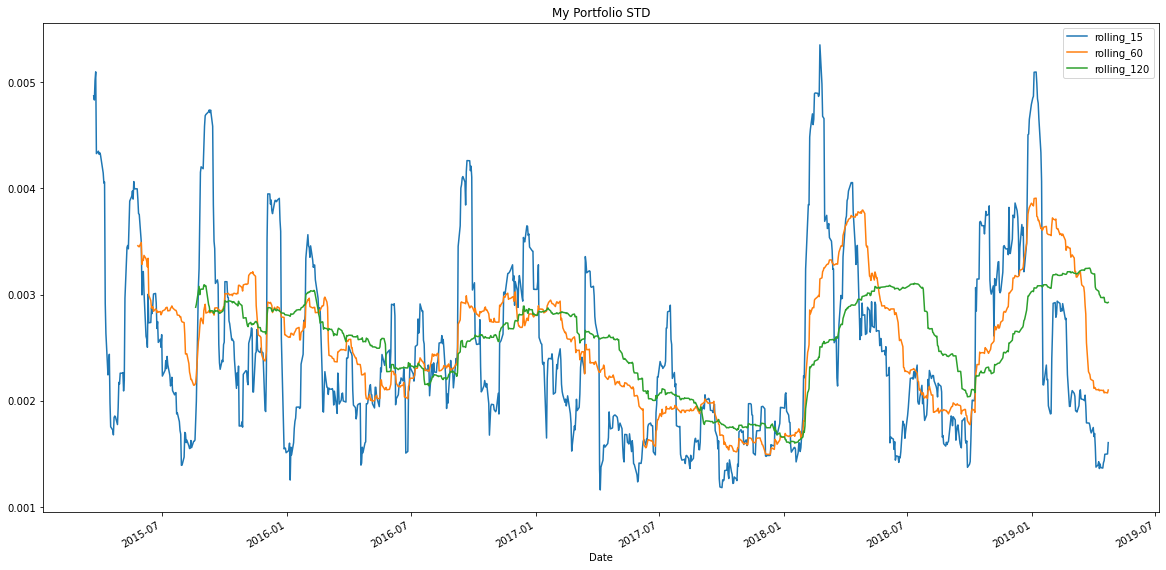

In [54]:
# Rolling
my_portfolio_rolling_15 = portfolio_returns[["My Portfolio"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["My Portfolio"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["My Portfolio"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'My Portfolio STD')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

In [60]:
# Annualized Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

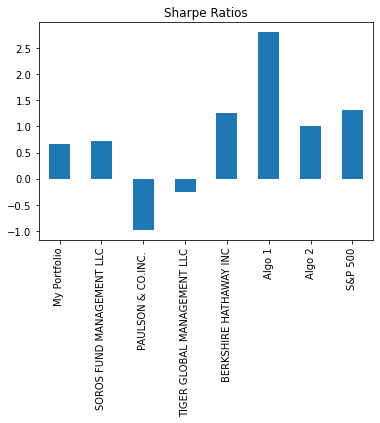

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

In [65]:
# Create a correlation table

correlation_table_all = portfolio_returns.corr()
correlation_table_all


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
My Portfolio,1.000000,0.557427,0.439894,0.435841,0.476409,0.211111,0.537995,0.625307
SOROS FUND MANAGEMENT LLC,0.557427,1.000000,0.699917,0.561249,0.754361,0.321206,0.826952,0.837895
PAULSON & CO.INC.,0.439894,0.699917,1.000000,0.434479,0.545623,0.268846,0.678191,0.669742
TIGER GLOBAL MANAGEMENT LLC,0.435841,0.561249,0.434479,1.000000,0.424424,0.164397,0.507430,0.623949
BERKSHIRE HATHAWAY INC,0.476409,0.754361,0.545623,0.424424,1.000000,0.292036,0.688130,0.751388
Algo 1,0.211111,0.321206,0.268846,0.164397,0.292036,1.000000,0.288321,0.279534
Algo 2,0.537995,0.826952,0.678191,0.507430,0.688130,0.288321,1.000000,0.858766
S&P 500,0.625307,0.837895,0.669742,0.623949,0.751388,0.279534,0.858766,1.000000


In [67]:
# Correlation to my portfolio

correlation_my_portfolio = portfolio_returns.corr().loc[:,"My Portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]
correlation_my_portfolio

My Portfolio                   1.000000
SOROS FUND MANAGEMENT LLC      0.557427
PAULSON & CO.INC.              0.439894
TIGER GLOBAL MANAGEMENT LLC    0.435841
BERKSHIRE HATHAWAY INC         0.476409
Algo 1                         0.211111
Algo 2                         0.537995
S&P 500                        0.625307
Name: My Portfolio, dtype: float64

<AxesSubplot:title={'center':'My Custom Prtfolio Beta'}, xlabel='Date'>

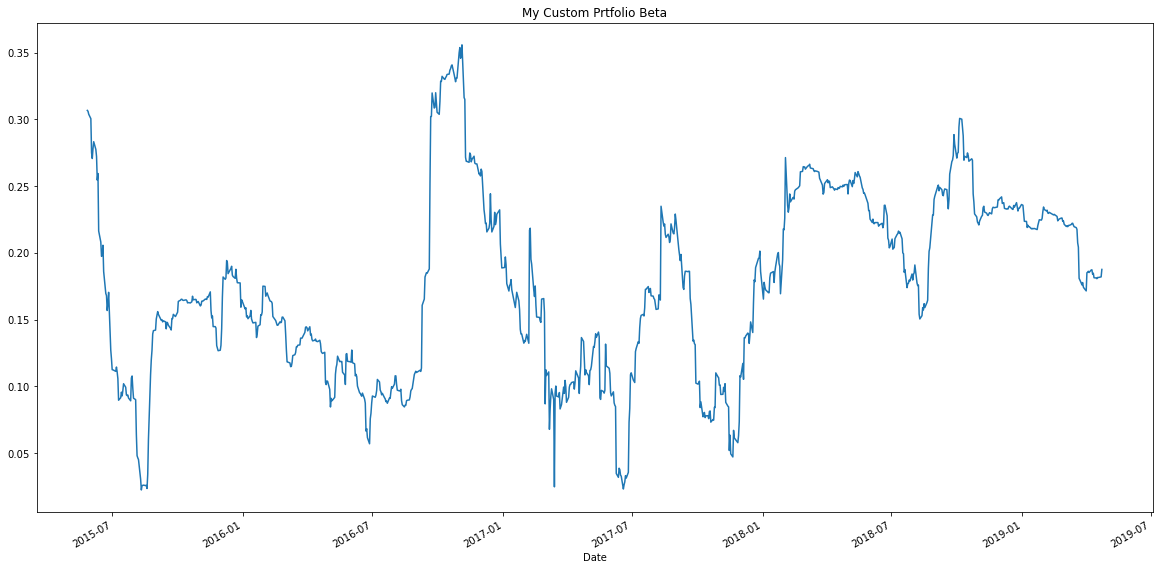

In [71]:
# Beta
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['S&P 500'])
rolling_variance = portfolio_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='My Custom Prtfolio Beta')